__Depois de estudar e testar os modelos de Regressão Linear, Árvores de Decisão e Random Forest, decidi que Random Forest era o mais fácil e mais preciso para resolver esse teste__

In [1]:
%pip install seaborn
%pip install matplotlib
%pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.comNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pan
import matplotlib.pyplot as plot

In [3]:
import seaborn as sea
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
base = pan.read_csv('Clean_Dataset.csv')

Primeiro verifiquei quais eram os tipos dos valores nas colunas:

In [5]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


Depois para confirmar se a base de dados foi importada corretamente, chequei se os valores estavam corretos

In [6]:
base.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Aqui tentei analisar através de um *heatmap* a relação do preço com os únicos valores inteiros da tabela

<Axes: >

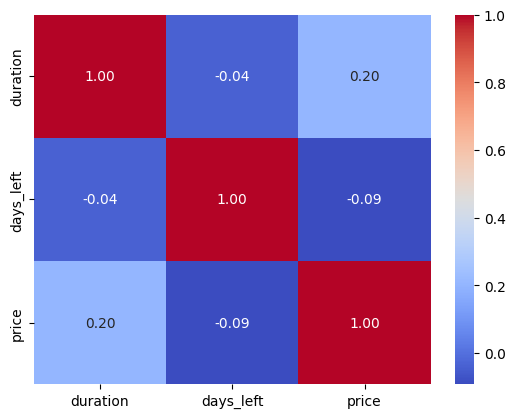

In [7]:
baseParaCorr = base.drop(['Unnamed: 0','airline','flight','source_city','departure_time', 'stops','arrival_time','destination_city','class'], axis=1)
corr = baseParaCorr.corr()
sea.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')

Removi da tabela a coluna que possui os ID's para facilitar na hora de criar a lista com os dados de treinamento e de teste

In [8]:
base = base.drop(columns= ['Unnamed: 0'])

Aqui a variável dependente que desejamos prever é separada no "y" (que é a coluna preço) e as variáveis independentes são separadas no X (todas as outras colunas menos '#' que é o ID)

In [9]:
y = base.iloc[:,10]
X = base.iloc[:, [0,1,2,3,4,5,6,7,8,9]].values

Verificando se os dados estão corretos

In [10]:
X

array([['SpiceJet', 'SG-8709', 'Delhi', ..., 'Economy', 2.17, 1],
       ['SpiceJet', 'SG-8157', 'Delhi', ..., 'Economy', 2.33, 1],
       ['AirAsia', 'I5-764', 'Delhi', ..., 'Economy', 2.17, 1],
       ...,
       ['Vistara', 'UK-832', 'Chennai', ..., 'Business', 13.83, 49],
       ['Vistara', 'UK-828', 'Chennai', ..., 'Business', 10.0, 49],
       ['Vistara', 'UK-822', 'Chennai', ..., 'Business', 10.08, 49]],
      dtype=object)

In [11]:
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

Aqui eu transformo os dados categóricos em dados numéricos através da função LabelEncoder

In [12]:
labelencoder = LabelEncoder()

for i in range(X.shape[1]):
    if X[:,i].dtype == 'object':
        X[:,i] = labelencoder.fit_transform(X[:,i])

Os dados de treinamento e de teste são divididos para que a previsão possa ser validada de forma justa

In [13]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X,y, test_size = 0.3, random_state=1)

O modelo é treinado com os dados de treinamento

In [14]:
modelo = RandomForestRegressor(random_state=1, n_estimators=100)
modelo.fit(X_treinamento, y_treinamento)

RandomForestRegressor(random_state=1)

Aqui o modelo treinado é utilizado para realizar as previsões sobre os dados de teste

In [15]:
previsoes = modelo.predict(X_teste)
previsoes

array([ 5973.27, 10858.26,  2948.85, ...,  8120.4 ,  3090.  , 72174.78])

**Relatórios e métricas para avaliarem a precisão do modelo:**

In [16]:
meanSquared = mean_squared_error(y_teste, previsoes)
r2Score = r2_score(y_teste, previsoes)
print(f"Mean Squared Error: {meanSquared} e R2 Score: {r2Score}")

Mean Squared Error: 5308833.674197387 e R2 Score: 0.9896635780648451


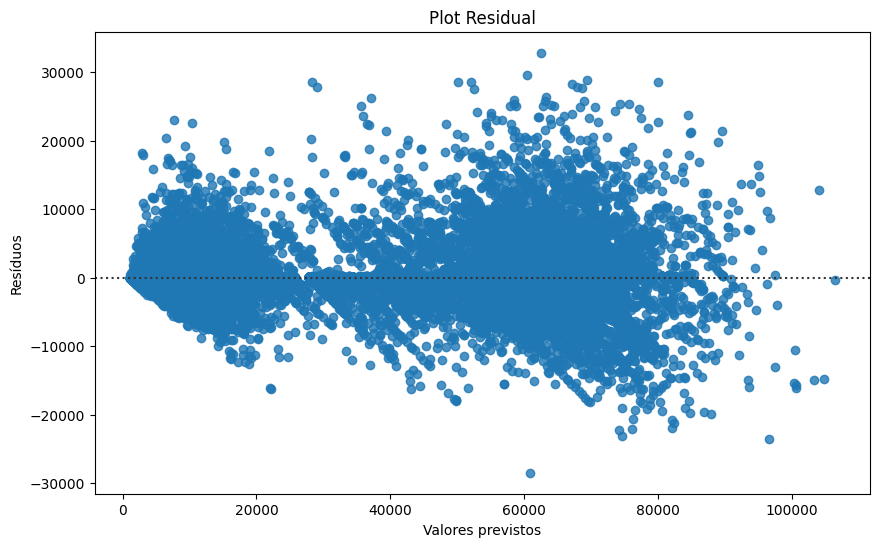

In [17]:
residuos = y_teste - previsoes
plot.figure(figsize=(10,6))
sea.residplot(x=previsoes, y=residuos, line_kws={"color": "blue"})
plot.xlabel("Valores previstos")
plot.ylabel("Resíduos")
plot.title("Plot Residual")
plot.show()

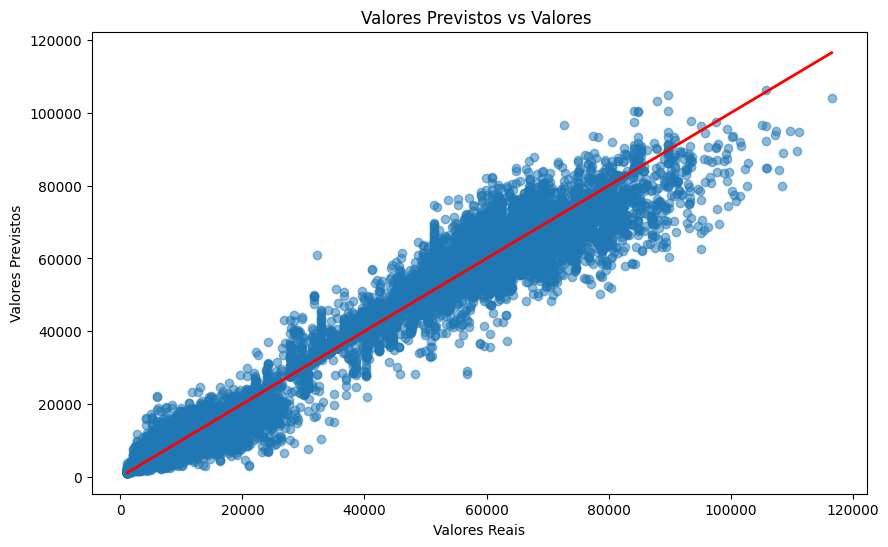

In [18]:
plot.figure(figsize=(10, 6))
plot.scatter(y_teste, previsoes, alpha=0.5)
plot.xlabel("Valores Reais")
plot.ylabel("Valores Previstos")
plot.title("Valores Previstos vs Valores ")
plot.plot([min(y_teste), max(y_teste)], [min(y_teste), max(y_teste)], color='red', lw=2)  # Linha de referência
plot.show()

In [19]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
mean_absolute = mean_absolute_error(y_teste, previsoes)
mean_absolute_percentage = mean_absolute_percentage_error(y_teste, previsoes)
print(f"Mean Absolute Error: {mean_absolute} e Mean Absolute Error %: {mean_absolute_percentage}")

Mean Absolute Error: 881.7410471146319 e Mean Absolute Error %: 0.05963486173886331
